In [128]:
import Plots as plt
import Flux , Statistics ,DataFrames , OneHotArrays

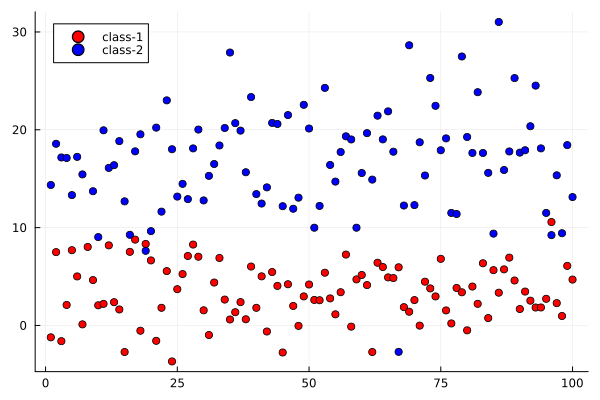

In [129]:
# Generate the Dataset
x1 = 3 .+ randn(100) .* 3;
x2 = 17 .+ randn(100) .* 5;
t = 1:100


plt.scatter(t,x1,color=:red,label="class-1")
plt.scatter!(t,x2,color=:blue,label="class-2")

In [162]:
X = transpose(hcat([x1 ; x2]))
Y = [ones(100) ; zeros(100)] # class-1 -> 1 and class-2 -> 0
println((X|>size , Y|>size))

((1, 200), (200,))


In [131]:
Yonehot = unique(Y) .== permutedims(Y) # One hot

2×200 BitMatrix:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1

In [132]:
# Note
[0.0 ; 1.0] .== [1.0 0.0 1.0 1.0 0.0]

2×5 BitMatrix:
 0  1  0  0  1
 1  0  1  1  0

In [133]:
W = rand(Float32,2,1);
b = Float32.([0,0]);

In [169]:
# Build a model
train_step(w,b,x) = (w.*x .+b) |> Flux.σ  # Softmax activation function

# loss
function custom_loss(W, b, x, y)
    ŷ = train_step(W, b, x)
    Flux.logitcrossentropy(ŷ, Y)
end;

function custom_onecold(custom_y_onehot)
    max_idx = [x[1] for x in argmax(custom_y_onehot; dims=1)]
    vec(classes[max_idx])
end;

# Accuracy
custom_accuracy(W, b, x, y) = mean(custom_onecold(train_step(W, b, x)) .== y);





In [170]:
# Train the model
function logistic_regression(X,Y,epochs,lr)
    accuracy = [] 
    nclasses = unique(Y) |> length
    Yonehot = nclasses .== permutedims(Y)
    W = rand(Float32 , nclasses , min(size(X)...))
    b = zeros(Float32,nclasses);
    for e in 1:epochs
        dLdW, dLdb, _, _ = Flux.gradient(custom_loss, W, b, X, Yonehot);
        W .= W .- lr .* dLdW
        b .= b .- lr .* dLdb
        acc = custom_accuracy(W, b, X, Y)
        append!(accuracy,acc)
        acc >= 0.98 && break
    end
    return W,b,accuracy
end

logistic_regression (generic function with 1 method)

In [171]:
W,b,acc = logistic_regression(X,Y,100,0.0001)

DimensionMismatch: DimensionMismatch: loss function expects size(ŷ) = (2, 200) to match size(y) = (200,)

In [150]:
W = rand(Float32,2,min(size(X)...))

2×1 Matrix{Float32}:
 0.32157642
 0.3689158

In [168]:
custom_y_onehot = unique(Y) .== permutedims(Y)

m(W, b, x) = W.*x .+ b
julia> W = rand(Float32, 3, 4);

julia> b = [0.0f0, 0.0f0, 0.0f0];

custom_model(W, b, X) = m(W, b, X) |> Flux.σ


function custom_loss(W, b, X, Y)
    ŷ = custom_model(W, b, X)
    Flux.logitcrossentropy(ŷ, Y)
end;

custom_loss(W, b, X, custom_y_onehot)



0.696873780123607

In [174]:
function train_custom_model()
    dLdW, dLdb, _, _ = Flux.gradient(custom_loss, W, b, X, custom_y_onehot)
    W .= W .- 0.1 .* dLdW
    b .= b .- 0.1 .* dLdb
end;

for i = 1:500
    train_custom_model();
    custom_accuracy(W, b, X, Y) >= 0.98 && break
end

@show custom_accuracy(W, b,X, Y);

DimensionMismatch: DimensionMismatch: loss function expects size(ŷ) = (2, 200) to match size(y) = (200,)